In [ ]:
# PURPOSE: to determine the zipcodes that are most similar

In [107]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()
# import math

In [98]:
# Read in data. Data is already clean.
precinct_data = pd.read_csv("Income-AgeByZipCode.csv")
precinct_data = precinct_data[["Zip Codesort column", "Median Household Income", "Median Age"]]
precinct_data = precinct_data.set_index('Zip Codesort column')
precinct_data

,Median Household Income,Median Age
Zip Codesort column,,
77002,"$87,888",37.2
77003,"$86,707",36.1
77004,"$55,289",35.9
77005,"$185,974",37.8
77006,"$90,467",41.3
...,...,...
77562,"$64,515",36.1
77571,"$87,410",36.9
77586,"$110,253",41.3


In [99]:
import re

# Create matrix where every entry is the absolute difference in med household income in precinct
incomes = pd.DataFrame(columns=precinct_data.index, index=precinct_data.index)
max_income_diff = 0 # keep track of max diff for normalization purposes later on
for zipcode2 in incomes.columns:
    for zipcode1 in incomes.index:
        med_income1_str = precinct_data.loc[zipcode1, "Median Household Income"]
        med_income2_str = precinct_data.loc[zipcode2, "Median Household Income"]
        # remove non-numeric vals from med_income1 and med_income2
        med_income1 = re.sub('[^0-9]','', med_income1_str)
        med_income2 = re.sub('[^0-9]','', med_income2_str)

        incomes.loc[zipcode1, zipcode2] = abs(float(med_income1) - float(med_income2))
        max_income_diff = max(max_income_diff, abs(float(med_income1) - float(med_income2)))
    # cast to floats
    incomes[zipcode2] = pd.to_numeric(incomes[zipcode2])

# Normalize incomes matrix
for zipcode1 in incomes.index:
    for zipcode2 in incomes.columns:
        incomes.loc[zipcode1, zipcode2] /= max_income_diff

incomes

Zip Codesort column,77002,77003,77004,77005,77006,77007,77008,77009,77010,77011,...,77521,77530,77532,77536,77547,77562,77571,77586,77587,77598
Zip Codesort column,,,,,,,,,,,,,,,,,,,,,
77002,0.000000,0.006274,0.173178,0.521069,0.013701,0.213021,0.180307,0.126843,0.085311,0.277375,...,0.058500,0.105254,0.052263,0.015969,0.205929,0.124166,0.002539,0.118811,0.197137,0.128352
77003,0.006274,0.000000,0.166904,0.527343,0.019975,0.219295,0.186581,0.120569,0.091585,0.271101,...,0.052226,0.098980,0.045989,0.022243,0.199655,0.117892,0.003735,0.125085,0.190863,0.122078
77004,0.173178,0.166904,0.000000,0.694247,0.186878,0.386198,0.353485,0.046334,0.258489,0.104197,...,0.114678,0.067924,0.120915,0.189147,0.032751,0.049012,0.170639,0.291989,0.023959,0.044826
77005,0.521069,0.527343,0.694247,0.000000,0.507368,0.308048,0.340762,0.647912,0.435758,0.798443,...,0.579569,0.626323,0.573332,0.505100,0.726997,0.645235,0.523608,0.402258,0.718205,0.649421
77006,0.013701,0.019975,0.186878,0.507368,0.000000,0.199320,0.166606,0.140544,0.071611,0.291075,...,0.072200,0.118955,0.065964,0.002268,0.219629,0.137867,0.016240,0.105110,0.210837,0.142053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77562,0.124166,0.117892,0.049012,0.645235,0.137867,0.337187,0.304473,0.002677,0.209477,0.153209,...,0.065666,0.018912,0.071903,0.140135,0.081763,0.000000,0.121627,0.242977,0.072971,0.004186
77571,0.002539,0.003735,0.170639,0.523608,0.016240,0.215560,0.182846,0.124304,0.087851,0.274835,...,0.055960,0.102715,0.049724,0.018508,0.203389,0.121627,0.000000,0.121350,0.194597,0.125813
77586,0.118811,0.125085,0.291989,0.402258,0.105110,0.094210,0.061496,0.245654,0.033500,0.396186,...,0.177311,0.224065,0.171074,0.102842,0.324740,0.242977,0.121350,0.000000,0.315948,0.247163


In [103]:
# Create matrix where every entry is the absolute difference in med age in precinct
ages = pd.DataFrame(columns=precinct_data.index, index=precinct_data.index)
max_age_diff = 0 # keep track of max diff for normalization purposes later on
for zipcode2 in ages.columns:
    for zipcode1 in ages.index:
        med_age1 = precinct_data.loc[zipcode1, "Median Age"]
        med_age2 = precinct_data.loc[zipcode2, "Median Age"]
        ages.loc[zipcode1, zipcode2] = abs(float(med_age1) - float(med_age2))
        max_age_diff = max(max_age_diff, abs(float(med_age1) - float(med_age2)))
    # cast to floats
    ages[zipcode2] = pd.to_numeric(ages[zipcode2])

# Normalize ages matrix
for zipcode1 in ages.index:
    for zipcode2 in ages.columns:
        ages.loc[zipcode1, zipcode2] /= max_age_diff
ages.dtypes

Zip Codesort column
77002    float64
77003    float64
77004    float64
77005    float64
77006    float64
          ...   
77562    float64
77571    float64
77586    float64
77587    float64
77598    float64
Length: 133, dtype: object

<AxesSubplot: xlabel='Zip Codesort column', ylabel='Zip Codesort column'>

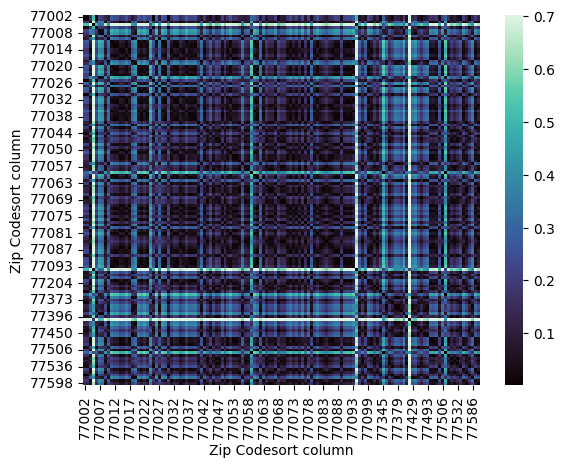

In [104]:
# make side-by-side heat map of med household income and med age
income_hmap = sns.heatmap(incomes, robust=True, cmap=sns.color_palette("mako", as_cmap=True))
income_hmap

<AxesSubplot: xlabel='Zip Codesort column', ylabel='Zip Codesort column'>

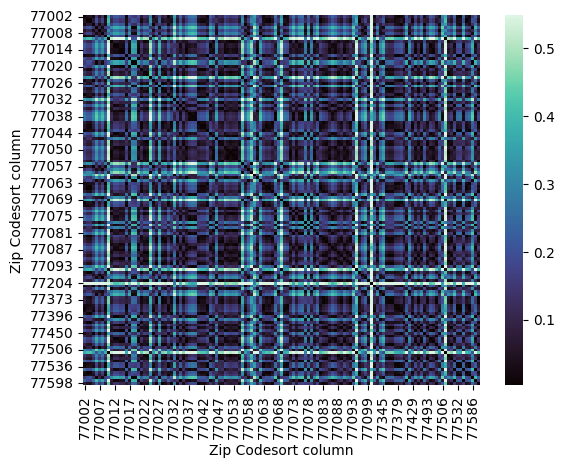

In [105]:
# make side-by-side heat map of med household income and med age
age_hmap = sns.heatmap(ages, robust=True, cmap=sns.color_palette("mako", as_cmap=True))
age_hmap

Text(0.5, 1.0, 'Difference in Median Age')

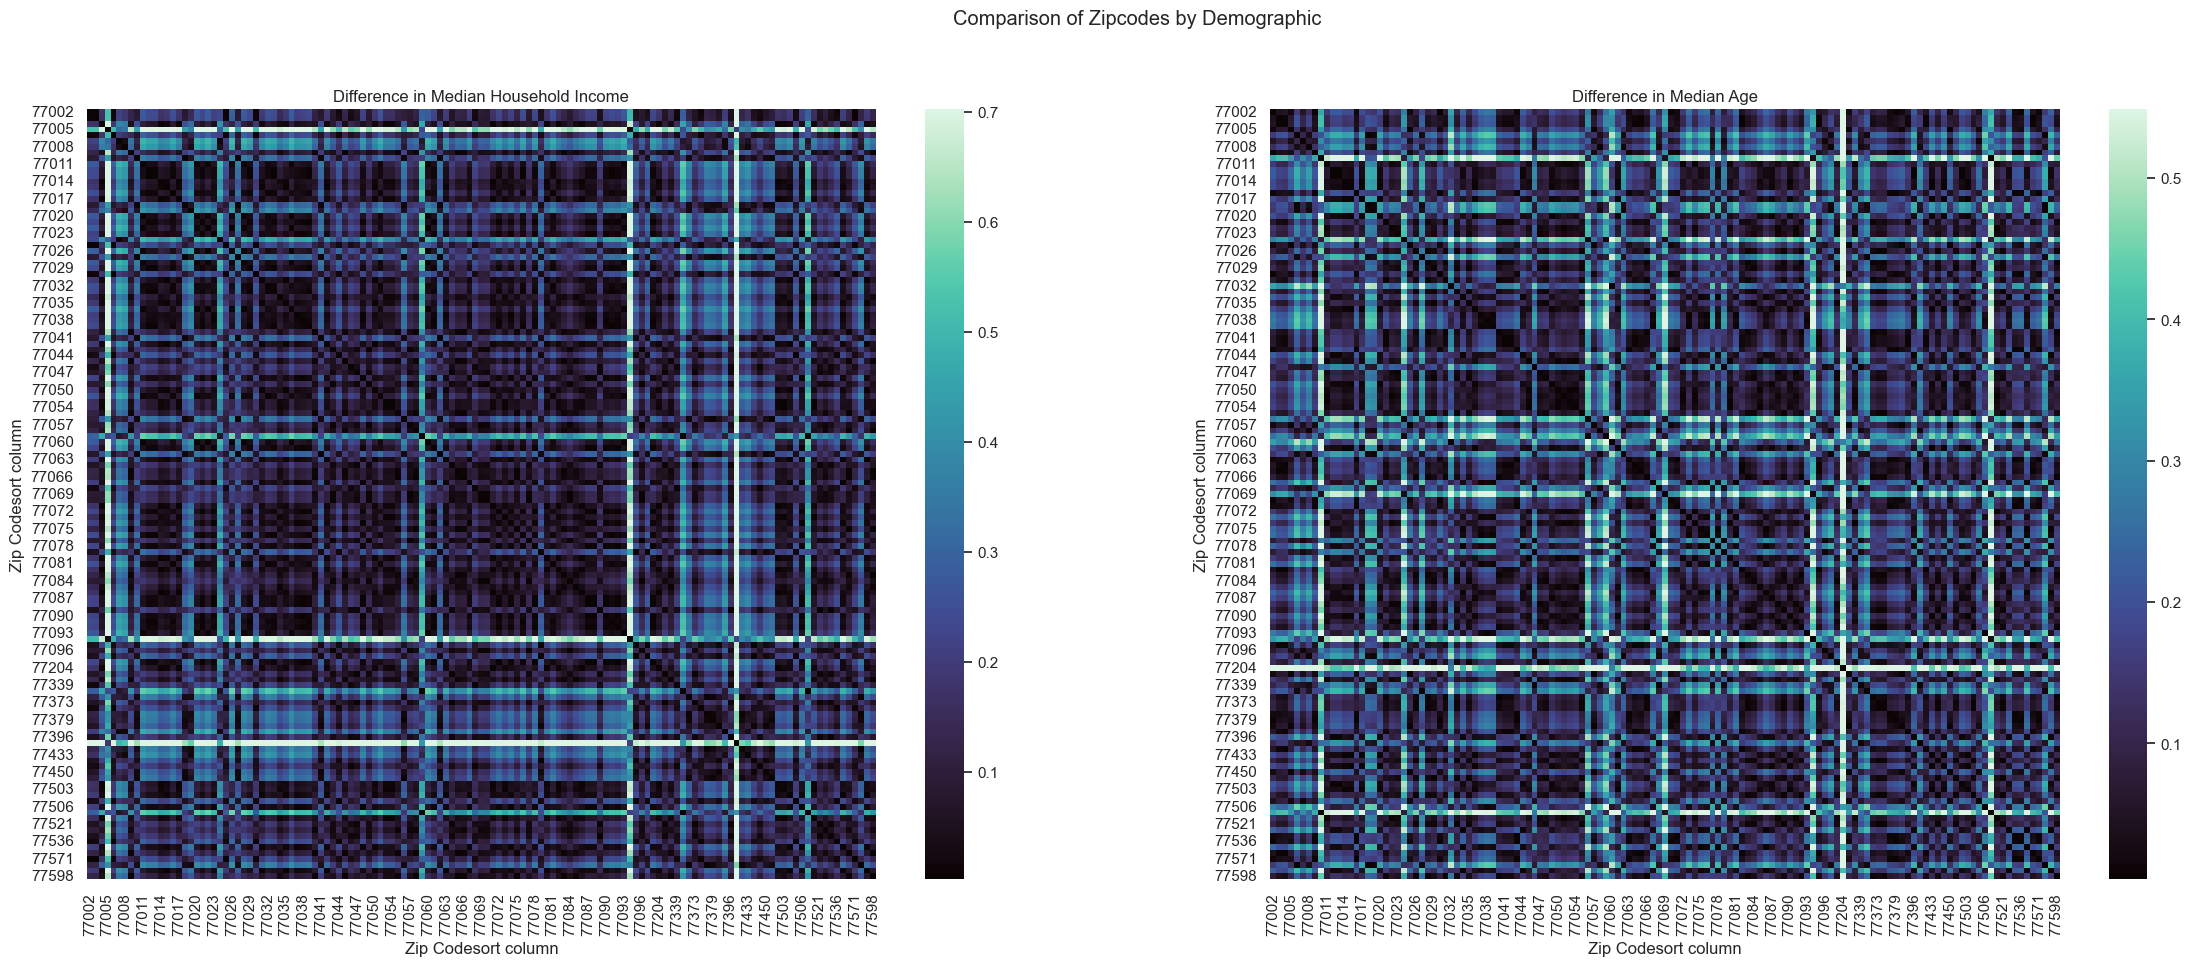

In [121]:
hmaps, axes = plt.subplots(1, 2, figsize=(28, 10))
hmaps.suptitle("Comparison of Zipcodes by Demographic")
sns.heatmap(ax=axes[0], data=incomes, robust=True, cmap=sns.color_palette("mako", as_cmap=True))
sns.heatmap(ax=axes[1], data=ages, robust=True, cmap=sns.color_palette("mako", as_cmap=True))
axes[0].set_title("Difference in Median Household Income")
axes[1].set_title("Difference in Median Age")